<a href="https://colab.research.google.com/github/Sudheeradh/CNN-model/blob/master/Cats%20vs%20Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing DataSet from Kaggle

In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pocof1","key":"8202d010bf32433467ad831d291ba8d8"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

100% 785M/788M [00:13<00:00, 54.0MB/s]
100% 788M/788M [00:13<00:00, 62.7MB/s]


In [0]:
!unzip microsoft-catsvsdogs-dataset.zip

In [0]:
!pip install opencv-python

# Loading the DataSet

In [0]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


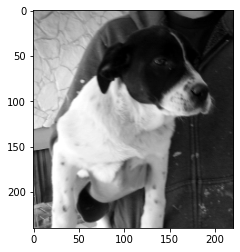

In [0]:
#setting up file location

DATADIR = '/content/PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break
  break

In [0]:
print(img_array) #shows the grayscale values of the image

[[136 156 159 ...  50  50  46]
 [132 149 161 ...  48  47  46]
 [137 144 154 ...  44  44  44]
 ...
 [137 135 103 ...  37  46  44]
 [138 142 103 ...  38  40  41]
 [187 152 139 ...  44  41  40]]


In [0]:
print(img_array.shape)

(240, 221)


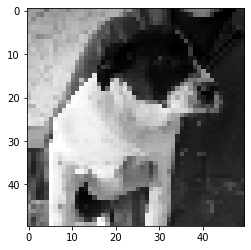

In [0]:
#Normalize the image shape
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [0]:
#creating training dataset

training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to images of cats or dogs
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [0]:
print(len(training_data))

24946


In [0]:
for sample in training_data:
  print(sample[1])

In [0]:
#The taining_data contains all dog images at the start, hence we shuffle the data
import random

random.shuffle(training_data)

In [0]:
for sample in training_data:
  print(sample[1])

In [0]:
#Setting the data labels to feed into the neural network

X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [0]:
#Converting lists to numpy arrays

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [0]:
#Saving the data through pickle

import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [0]:
X.shape # X is an array of 24946 examples of 60x60 images (grayscale)

(24946, 50, 50, 1)

In [0]:
type(y)

numpy.ndarray

# Building the neural network

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

In [0]:
#Normalizing the data
X = X/255.0

Creating the model of neural network:
*   2 convolution layers with maxpooling and ReLU activation 
*   1 dense layer
*  1 dense layer







In [0]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

Compiling the model

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])

Fitting the model

In [0]:
model.fit(X, y, batch_size = 64, epochs = 10, validation_split = 0.1)

Epoch 1/10
351/351 [==============================] - 3s 9ms/step - loss: 0.6243 - accuracy: 0.6423 - val_loss: 0.5598 - val_accuracy: 0.7134
Epoch 2/10
351/351 [==============================] - 3s 8ms/step - loss: 0.5158 - accuracy: 0.7469 - val_loss: 0.4944 - val_accuracy: 0.7675
Epoch 3/10
351/351 [==============================] - 3s 8ms/step - loss: 0.4606 - accuracy: 0.7847 - val_loss: 0.4881 - val_accuracy: 0.7703
Epoch 4/10
351/351 [==============================] - 3s 8ms/step - loss: 0.4188 - accuracy: 0.8087 - val_loss: 0.4588 - val_accuracy: 0.7876
Epoch 5/10
351/351 [==============================] - 3s 8ms/step - loss: 0.3811 - accuracy: 0.8293 - val_loss: 0.4678 - val_accuracy: 0.7772
Epoch 6/10
351/351 [==============================] - 3s 8ms/step - loss: 0.3440 - accuracy: 0.8454 - val_loss: 0.4965 - val_accuracy: 0.7715
Epoch 7/10
351/351 [==============================] - 3s 8ms/step - loss: 0.2958 - accuracy: 0.8742 - val_loss: 0.4828 - val_accuracy: 0.7864
Epoch 

This model has 94.3% accuracy on Training set and 78.48% accuracy on Validation set